In [2]:
# Importing Libraries

import pandas as pd
import numpy as nm
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
color = sbn.color_palette()

In [25]:
# Importing the csv file

data = pd.read_csv('Data_Analysis.csv')

print("data_shape : ",data.shape)

data.head()

data_shape :  (38845, 11)


,Unnamed: 0,Billing dt,Net Amount in Lakh,Qty,Description,Cust Grp Text,State Text,Segment Desc,Product Category,NAME,Unit
0,40234,2022-01-01,0.741597,1.00,SUPERPOWER 90 (25 MM )-TRADE,Institution,Andhra Pradesh,Institution,Cartridge,TRANSTECH GEOMATRIX,TO
1,40079,2022-01-01,6.422432,11.75,SOLAR-BE 101,MCL,Orissa,Coal,Bulk,MAHANADI COALFIELDS LIMITED,TO
2,40078,2022-01-01,39.287204,320000.00,SOLAR AED : ULTRA SAFE 1.5 MTR (1600 N),Housing & Infra,Maharashtra,Housing & Infra,Detonator,"MARUTI ENTERPRISES,PAROLA",EA
3,40077,2022-01-01,6.209524,12.00,SOLARGEL 125 MM (COAL),WCL,Maharashtra,Coal,Cartridge,WCL-GHUGUS OPENCAST,TO
4,40076,2022-01-01,1.669621,3.00,SOLARPRIME 125 MM (COAL),WCL,Maharashtra,Coal,Cartridge,WCL-GHUGUS OPENCAST,TO


In [26]:
# Checking elementry information about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38845 entries, 0 to 38844
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          38845 non-null  int64  
 1   Billing dt          38845 non-null  object 
 2   Net Amount in Lakh  38845 non-null  float64
 3   Qty                 38845 non-null  float64
 4   Description         38845 non-null  object 
 5   Cust Grp Text       38844 non-null  object 
 6   State Text          38754 non-null  object 
 7   Segment Desc        34264 non-null  object 
 8   Product Category    38520 non-null  object 
 9   NAME                38845 non-null  object 
 10  Unit                38845 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.3+ MB


In [27]:
# Checking for NULL values

print(data.isnull().sum())
print()
print("""
Cust Grp Text -> 1 NULL value
State Text -> 91 NULL values
Segment Desc -> 4581 NULL values
Product Category -> 325 NULL values""")

Unnamed: 0               0
Billing dt               0
Net Amount in Lakh       0
Qty                      0
Description              0
Cust Grp Text            1
State Text              91
Segment Desc          4581
Product Category       325
NAME                     0
Unit                     0
dtype: int64


Cust Grp Text -> 1 NULL value
State Text -> 91 NULL values
Segment Desc -> 4581 NULL values
Product Category -> 325 NULL values


### Missing Value Treatment

In [28]:
# Dropping rows which has NULL values in "Cust Grp Text", "State Text", "Segment Desc" and "Product Category"

data.dropna(how='any', subset=["Cust Grp Text", "State Text", "Segment Desc" , "Product Category"], axis=0, inplace = True)

In [29]:
# Checking wheather the drop action has succesfully accomplished or not

print("data_shape with no NULL values : ",data.shape)
print()
print(data.isnull().sum())

data_shape with no NULL values :  (34044, 11)

Unnamed: 0            0
Billing dt            0
Net Amount in Lakh    0
Qty                   0
Description           0
Cust Grp Text         0
State Text            0
Segment Desc          0
Product Category      0
NAME                  0
Unit                  0
dtype: int64


### 1) Top 10 Product Category in terms of Net amount sales:-

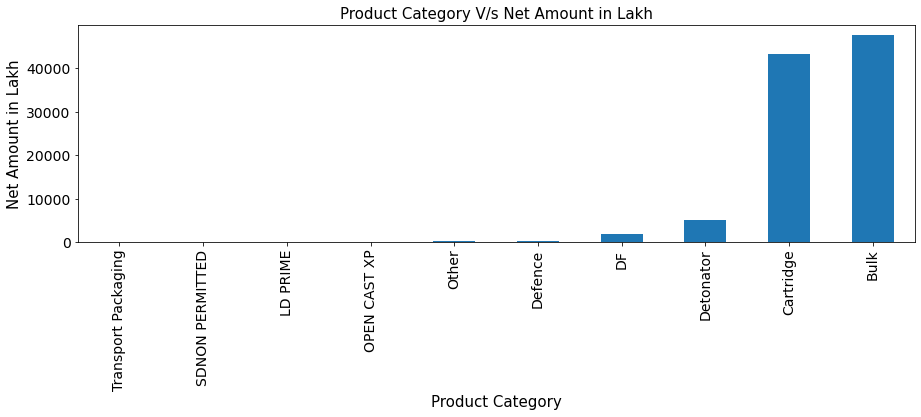


Product Category : Bulk & Cartridge contribute to the maximum Net amount sales


In [67]:
cat_amnt = data.groupby('Product Category')['Net Amount in Lakh'].sum().sort_values()
plt.subplots(figsize=(15,4))
cat_amnt.plot(kind='bar', fontsize=14)
plt.title("Product Category V/s Net Amount in Lakh",fontsize=15)
plt.xlabel("Product Category",fontsize=15)
plt.ylabel("Net Amount in Lakh",fontsize=15)
plt.show()
print()
print("Product Category : Bulk & Cartridge contribute to the maximum Net amount sales")

###  2) Top 10 product name in terms of quantity of sales:-

In [31]:
# Getting Top 10 Products by grouping products('Description') and transforming w.r.t. max 'Qty'

data['top 10 products'] = data.groupby(['Description'])['Qty'].transform(max)
data.head(2)

,Unnamed: 0,Billing dt,Net Amount in Lakh,Qty,Description,Cust Grp Text,State Text,Segment Desc,Product Category,NAME,Unit,top 10 products
0,40234,2022-01-01,0.741597,1.00,SUPERPOWER 90 (25 MM )-TRADE,Institution,Andhra Pradesh,Institution,Cartridge,TRANSTECH GEOMATRIX,TO,15.00
1,40079,2022-01-01,6.422432,11.75,SOLAR-BE 101,MCL,Orissa,Coal,Bulk,MAHANADI COALFIELDS LIMITED,TO,1802.06


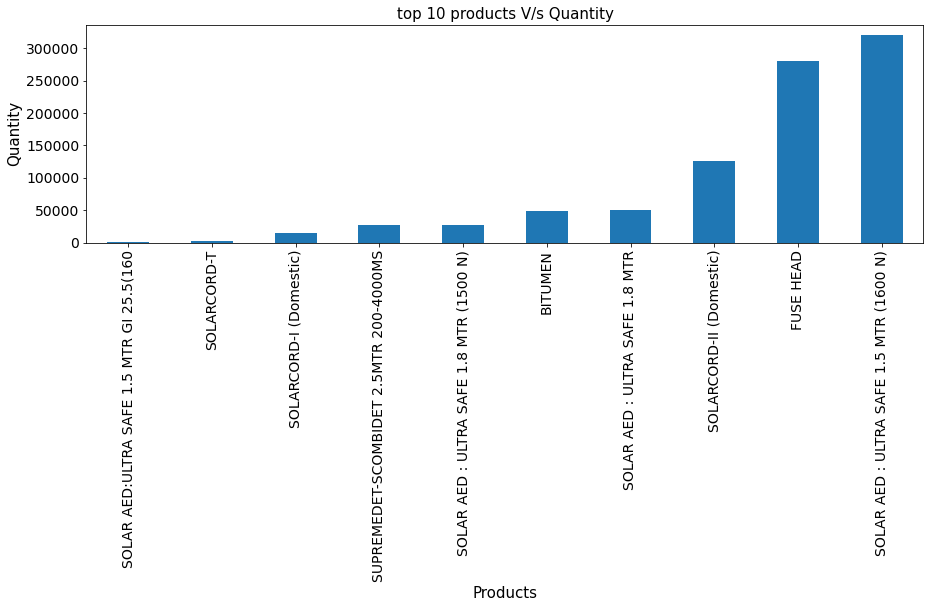

In [68]:
# Making Dataframe "data2" and shorting it to get clear Visualization 

data2 = data.drop_duplicates(['top 10 products']).nlargest(10, 'top 10 products')[['Description', 'Qty']]

# Visualizing Top 10 Products in terms of quantity of sales

prod_qty = data2.groupby('Description')['Qty'].sum().sort_values()
plt.subplots(figsize=(15,4))
prod_qty.plot(kind='bar', fontsize=14)
plt.title("top 10 products V/s Quantity",fontsize=15)
plt.xlabel("Products",fontsize=15)
plt.ylabel("Quantity",fontsize=15)
plt.show()

### 3) Top 10 state in terms of Net Amount sales:-

In [33]:
# Getting Top 10 States by grouping "States" and transforming w.r.t. max 'Net Amount in Lakh'

data['top 10 state_sale'] = data.groupby(['State Text'])['Net Amount in Lakh'].transform(max)
data.head(2)

,Unnamed: 0,Billing dt,Net Amount in Lakh,Qty,Description,Cust Grp Text,State Text,Segment Desc,Product Category,NAME,Unit,top 10 products,top 10 state_sale
0,40234,2022-01-01,0.741597,1.00,SUPERPOWER 90 (25 MM )-TRADE,Institution,Andhra Pradesh,Institution,Cartridge,TRANSTECH GEOMATRIX,TO,15.00,8.98184
1,40079,2022-01-01,6.422432,11.75,SOLAR-BE 101,MCL,Orissa,Coal,Bulk,MAHANADI COALFIELDS LIMITED,TO,1802.06,34.50000


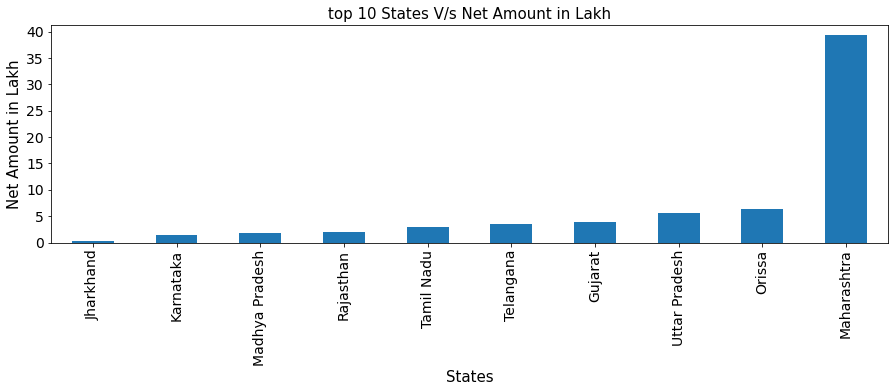

In [69]:
# Making Dataframe "data2" and shorting it to get clear Visualization 

data3 = data.drop_duplicates(['top 10 state_sale']).nlargest(10, 'top 10 state_sale')[['State Text', 'Net Amount in Lakh']]

# Visualizing Top 10 "States" in terms of "Net Amount in Lakh"

state_sale = data3.groupby('State Text')['Net Amount in Lakh'].sum().sort_values()
plt.subplots(figsize=(15,4))
state_sale.plot(kind='bar', fontsize=14)
plt.title("top 10 States V/s Net Amount in Lakh",fontsize=15)
plt.xlabel("States",fontsize=15)
plt.ylabel("Net Amount in Lakh",fontsize=15)
plt.show()

###  4) Get insights in terms of quantity of sales:-

In [35]:
### Some Feature Engineering with "Billing Date"

# Making "Month" Colum
data['Month'] = data['Billing dt'].str.split('-').str[1]

In [36]:
### Working with datatype of 'Year' and 'Month' Column

data['Month'] = data['Month'].astype(int)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34044 entries, 0 to 38844
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          34044 non-null  int64  
 1   Billing dt          34044 non-null  object 
 2   Net Amount in Lakh  34044 non-null  float64
 3   Qty                 34044 non-null  float64
 4   Description         34044 non-null  object 
 5   Cust Grp Text       34044 non-null  object 
 6   State Text          34044 non-null  object 
 7   Segment Desc        34044 non-null  object 
 8   Product Category    34044 non-null  object 
 9   NAME                34044 non-null  object 
 10  Unit                34044 non-null  object 
 11  top 10 products     34044 non-null  float64
 12  top 10 state_sale   34044 non-null  float64
 13  Month               34044 non-null  int32  
dtypes: float64(4), int32(1), int64(1), object(8)
memory usage: 3.8+ MB


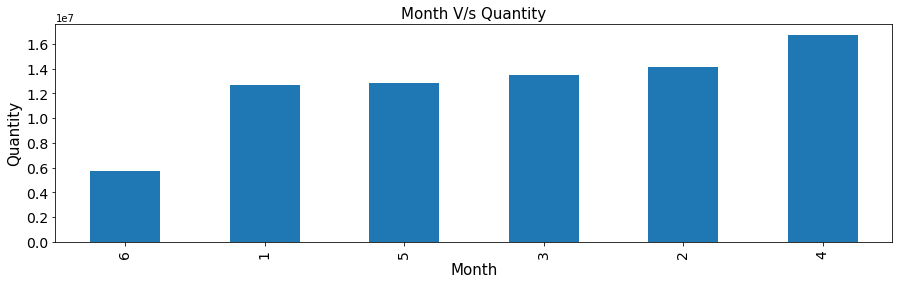


April contributes to the maximum quantity of sales


In [70]:
### Visualizing the total "quantity of sales" in terms of "Month" 

mnth_qnt = data.groupby('Month')['Qty'].sum().sort_values()
plt.subplots(figsize=(15,4))
mnth_qnt.plot(kind='bar', fontsize=14)
plt.title("Month V/s Quantity",fontsize=15)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Quantity",fontsize=15)
plt.show()
print()
print("April contributes to the maximum quantity of sales")

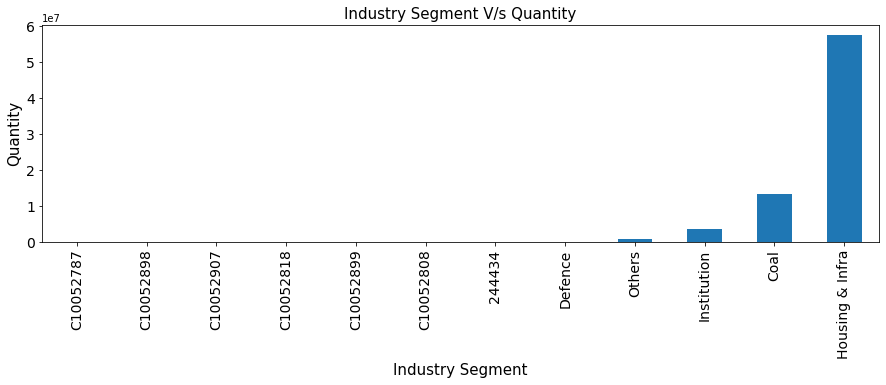


Housing & Infra along with Coal Industry procure Maximum quantity of Solar Pannel


In [71]:
### Visualizing the total "quantity of sales" in terms of "Industry Segment" 

seg_qnt = data.groupby('Segment Desc')['Qty'].sum().sort_values()
plt.subplots(figsize=(15,4))
seg_qnt.plot(kind='bar', fontsize=14)
plt.title("Industry Segment V/s Quantity",fontsize=15)
plt.xlabel("Industry Segment",fontsize=15)
plt.ylabel("Quantity",fontsize=15)
plt.show()
print()
print("Housing & Infra along with Coal Industry procure Maximum quantity of Solar Pannel")

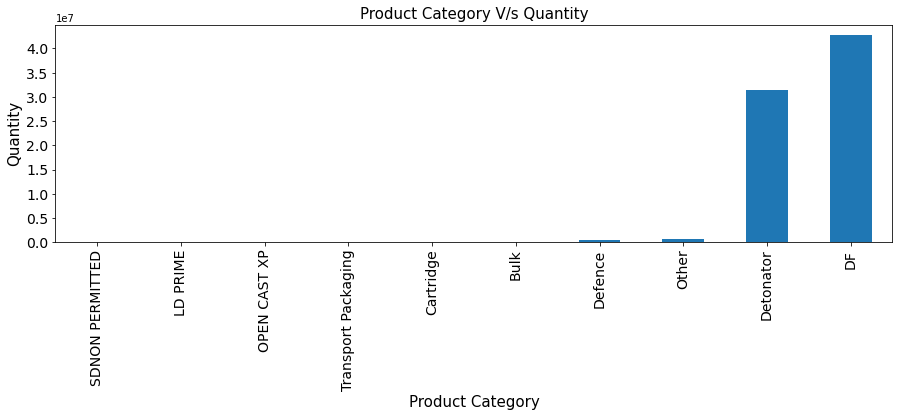


Product Category: 'DF' & 'Detonator' Contributes Maximum quantity of Sales


In [66]:
### Visualizing the total "quantity of sales" in terms of "Product Category" 

category_qnt = data.groupby('Product Category')['Qty'].sum().sort_values()
plt.subplots(figsize=(15,4))
category_qnt.plot(kind='bar', fontsize=14)
plt.title("Product Category V/s Quantity",fontsize=15)
plt.xlabel("Product Category",fontsize=15)
plt.ylabel("Quantity",fontsize=15)
plt.show()
print()
print("Product Category: 'DF' & 'Detonator' Contributes Maximum quantity of Sales")

In [52]:
# Getting Top 10 Company name by grouping Company('NAME') and transforming w.r.t. max 'Qty'

data['top_Company_sale_qty'] = data.groupby(['NAME'])['Qty'].transform(max)
data.head(2)

,Unnamed: 0,Billing dt,Net Amount in Lakh,Qty,Description,Cust Grp Text,State Text,Segment Desc,Product Category,NAME,Unit,top 10 products,top 10 state_sale,Month,top 10 Company,top_Company_sale_qty
0,40234,2022-01-01,0.741597,1.00,SUPERPOWER 90 (25 MM )-TRADE,Institution,Andhra Pradesh,Institution,Cartridge,TRANSTECH GEOMATRIX,TO,15.00,8.98184,1,10.0,10.0
1,40079,2022-01-01,6.422432,11.75,SOLAR-BE 101,MCL,Orissa,Coal,Bulk,MAHANADI COALFIELDS LIMITED,TO,1802.06,34.50000,1,13.3,13.3


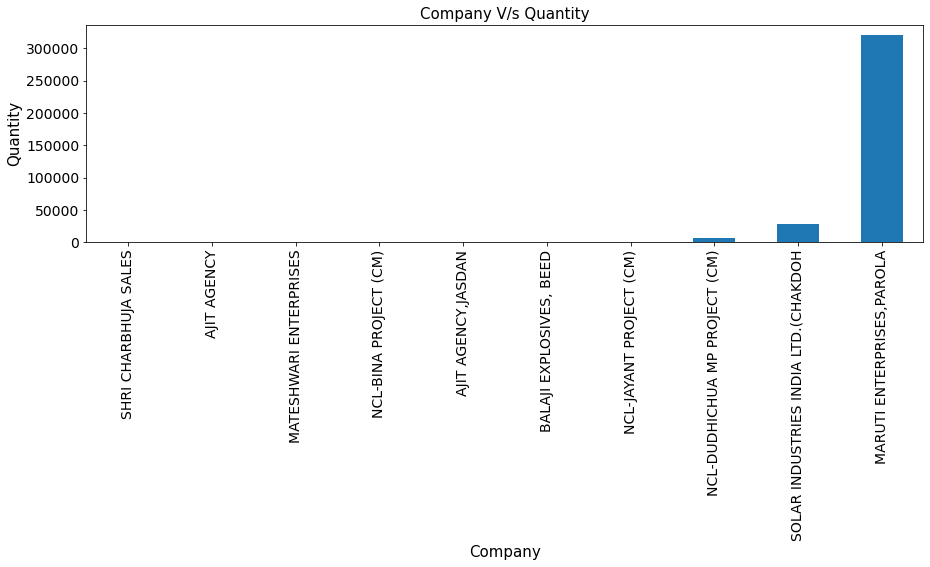

Maruti Enterprises & Solar Industries India Ltd. are only Companies which seems to have sufficient procurement


In [72]:
# Making Dataframe "data4" and shorting it to get clear Visualization 

data4 = data.drop_duplicates(['top_Company_sale_qty']).nlargest(10, 'top_Company_sale_qty')[['NAME', 'Qty']]

# Visualizing Top 10 Company in terms of quantity of sales

comp_qty = data4.groupby('NAME')['Qty'].sum().sort_values()
plt.subplots(figsize=(15,4))
comp_qty.plot(kind='bar', fontsize=14)
plt.title("Company V/s Quantity",fontsize=15)
plt.xlabel("Company",fontsize=15)
plt.ylabel("Quantity",fontsize=15)
plt.show()

print('Maruti Enterprises & Solar Industries India Ltd. are only Companies which seems to have sufficient procurement')

### 5) Get insights in terms of product name and Quantity of sales:-

In [57]:
# Getting Top 10 Products by grouping products('Description') and transforming w.r.t. max 'Qty'

data['top 10 products'] = data.groupby(['Description'])['Qty'].transform(max)

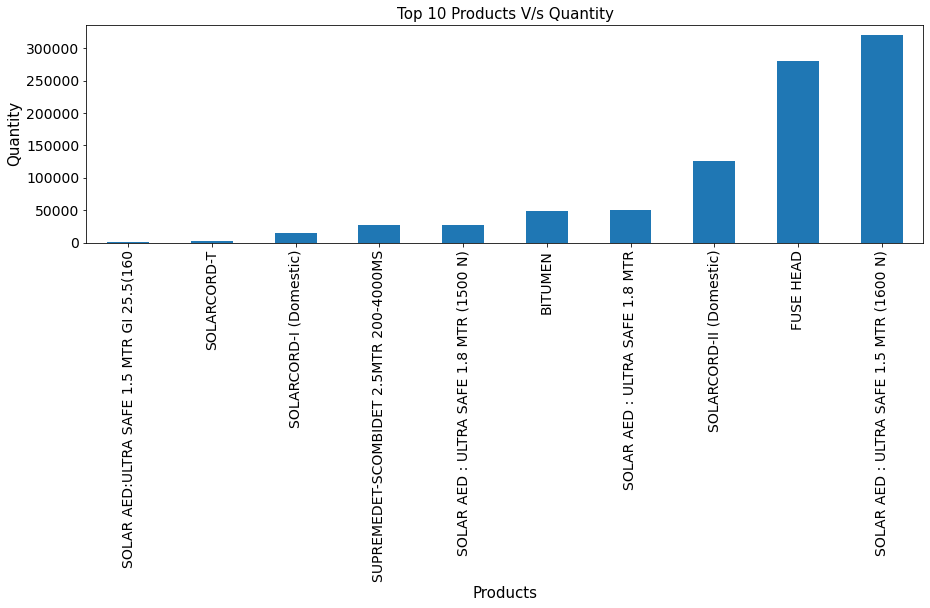

In [73]:
# Making Dataframe "data2" and shorting it to get clear Visualization 

data5 = data.drop_duplicates(['top 10 products']).nlargest(10, 'top 10 products')[['Description', 'Qty']]

# Visualizing Top 10 Products in terms of quantity of sales

prod_qty = data5.groupby('Description')['Qty'].sum().sort_values()
plt.subplots(figsize=(15,4))
prod_qty.plot(kind='bar', fontsize=14)
plt.title("Top 10 Products V/s Quantity",fontsize=15)
plt.xlabel("Products",fontsize=15)
plt.ylabel("Quantity",fontsize=15)
plt.show()

# Conclusion:-
### 1.) Product Category: Bulk, Cartridge have Maximum contribution in terms of Net amount sales.
###      Product Category: Detonator, DF, Defence and others have least contribution towards Net amount sales.
### 2.) Product Name: Solar AED : Ultra Safe 1.5 mtr (1600N), Fuse Head, Solarcord - II (Domestic) are contributing to the Maximum Quantity of Sales. 
### 3.) States: Maharastra have highest contribution towards Net Amount Sale while Jharlhand contributes to least.
### 4.) Insight for Quantity of Sale- 
###       -> Month of April followed by February contributes to Maximum Procurement, while June contributes to least Procurement.
###       -> Segment of Housing & Infra followed by Coal Procures the Maximum Quantity.
###       -> Product Category of DF & Detonator has Highest Quantity of Procurement.
###       -> Maruti Enterprises & Solar Industries India Ltd. are only Companies which seems to have sufficient procurement.
